In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import vc_utils as vutils
import joblib


In [3]:
dataset = pd.read_pickle('../../geodata/results/01_master_building_dataset.pkl').reset_index()

In [15]:
maxvsh_cols    = dataset.columns[dataset.columns.str.contains('maxvsh')].tolist()
vaccess_cols   = dataset.columns[dataset.columns.str.contains('vwa')].tolist()
# mean_cols      = dataset.columns[dataset.columns.str.contains('mn')].tolist()
dist_cols      = dataset.columns[dataset.columns.str.contains('sum_')].tolist()
vconfig_cols   = np.setdiff1d(dataset.columns[np.where(dataset.columns == 'snt_0')[0][0]:np.where(dataset.columns == 'cmpx_gini')[0][0]+1].tolist(),dist_cols).tolist()
id_cols        = ['ID_Geb','Stockwerk','FassPktX','FassPktY','FassPktZ']

dataset['unit_pano'] = dataset['unit_pano'].fillna(0)

In [16]:
import joblib
scaler_4model   = joblib.load("../../geodata/results/scaler_for_model.joblib")

In [5]:
# from sklearn.preprocessing import MinMaxScaler

# model_feats    = maxvsh_cols+vaccess_cols+vconfig_cols+dist_cols

# scaler = MinMaxScaler()
# scaler.fit(dataset[model_feats])

# Xscaled = dataset.copy()
# Xscaled[model_feats] = scaler.transform(dataset[model_feats])

MinMaxScaler()

In [17]:
Xscaled = dataset.copy()
model_feats    = maxvsh_cols+vaccess_cols+vconfig_cols+dist_cols

Xscaled[model_feats] = scaler_4model.transform(dataset[model_feats])

In [18]:
import joblib
xgb_model   = joblib.load("../../geodata/results/t10agglo_t5urban_models/All_XGB.joblib")
lr_model    = joblib.load("../../geodata/results/t10agglo_t5urban_models/All_LinearReg.joblib")
rf_model    = joblib.load("../../geodata/results/t10agglo_t5urban_models/All_RF.joblib")
lgbm_model  = joblib.load("../../geodata/results/t10agglo_t5urban_models/All_LGBM.joblib")
lasso_model = joblib.load("../../geodata/results/t10agglo_t5urban_models/All_LassoReg.joblib")
nn_model    = joblib.load("../../geodata/results/t10agglo_t5urban_models/All_NN.joblib")

%time Xscaled['XGB']    = xgb_model.predict(Xscaled[model_feats])
%time Xscaled['LinReg'] = lr_model.predict(Xscaled[model_feats])
%time Xscaled['RF']     = rf_model.predict(Xscaled[model_feats])
%time Xscaled['LassoReg']     = lasso_model.predict(Xscaled[model_feats])
%time Xscaled['NN']     = nn_model.predict(Xscaled[model_feats])

CPU times: total: 20.2 s
Wall time: 2.72 s
CPU times: total: 2.97 s
Wall time: 901 ms


[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  95 out of 100 | elapsed:   25.0s remaining:    1.2s
[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:   25.8s finished


CPU times: total: 7min 50s
Wall time: 28.2 s
CPU times: total: 4.08 s
Wall time: 2.25 s
CPU times: total: 7.06 s
Wall time: 2.5 s


In [19]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
Xpca = pca.fit_transform(Xscaled[model_feats])

print(pca.explained_variance_ratio_)
print(pca.singular_values_)


[0.23789149 0.1699907 ]
[955.20542018 807.4579284 ]


In [32]:
import seaborn as sns
import mapclassify as mc

In [29]:
df = pd.concat([pd.DataFrame(Xpca), Xscaled[['XGB','LinReg','RF','LassoReg','NN']]], axis = 1)

<Axes: xlabel='0', ylabel='1'>

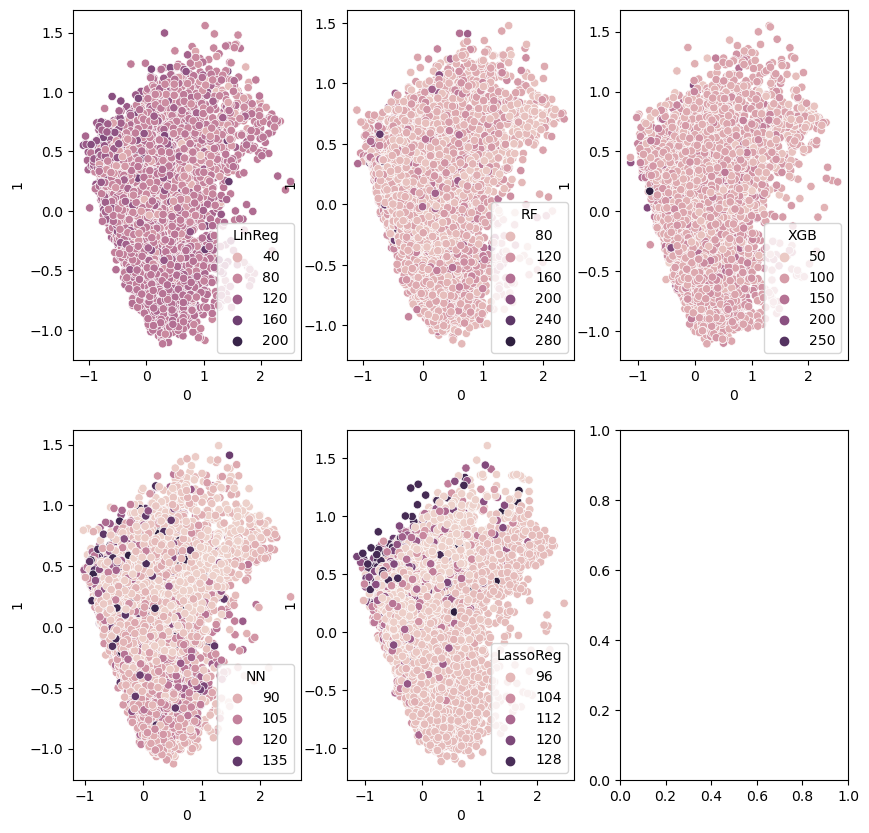

In [38]:
f, ax = plt.subplots(2,3, figsize = (10,10), squeeze=True)
ax = ax.flatten()

sns.scatterplot(data = df.sample(10000), x = 0, y = 1, hue = "LinReg", ax = ax[0])
sns.scatterplot(data = df.sample(10000), x = 0, y = 1, hue = "RF", ax = ax[1])
sns.scatterplot(data = df.sample(10000), x = 0, y = 1, hue = "XGB", ax = ax[2])
sns.scatterplot(data = df.sample(10000), x = 0, y = 1, hue = "NN", ax = ax[3])
sns.scatterplot(data = df.sample(10000), x = 0, y = 1, hue = "LassoReg", ax = ax[4])



In [ ]:
import matplotlib.pyplt as plt

sns.scatterplot(data = df.sample(10000), x = 0, y = 1, hue = "LinReg", ax = ax[0])


In [ ]:
Xscaled.Agglo_Name

In [40]:
import umap

In [45]:
Xsamp = Xscaled[model_feats].sample(500000)

In [69]:
fit = umap.UMAP()
%time u = fit.fit_transform(trx[model_feats])

CPU times: total: 4min 25s
Wall time: 18.5 s


In [70]:
trx.columns

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'Group.1', 'Group.2',
       'REGCODE_GIS', 'KJ', 'KAUF_Q', 'KONPE', 'NUTZ_WUP',
       ...
       'pano_sum', 'pano_rich', 'refuge', 'unit_pano', 'XGB', 'RF', 'LGBM',
       'LassoReg', 'NN', 'LinearReg'],
      dtype='object', length=160)

In [189]:
uu = fit.transform(dataset[model_feats])

In [1]:
plt.scatter(u[:,0], u[:,1], c=trx.LAND, s = .5)
plt.title('UMAP embedding of view-metrics');

NameError: name 'plt' is not defined

In [77]:
df = pd.concat([pd.DataFrame(u), trx], axis = 1)

In [4]:
tx_dataset = pd.read_csv(r"C:\Users\swietek\Documents\View\Swiss_View\Swiss_View\geodata\archive\trx_viewdata_feb10_matched.csv")


C:\Users\swietek\AppData\Local\Temp\ipykernel_13824\3649537393.py:1: DtypeWarning: Columns (15,23,30) have mixed types. Specify dtype option on import or set low_memory=False.
  tx_dataset = pd.read_csv(r"C:\Users\swietek\Documents\View\Swiss_View\Swiss_View\geodata\archive\trx_viewdata_feb10_matched.csv")


In [5]:
tx_dataset['unit_pano'] = 0

In [ ]:
models = [xgb_model,lr_model,rf_model,lgbm_model,lasso_model,nn_model]

In [60]:
pd.Series(lasso_model.feature_names_in_)[~pd.Series(lasso_model.feature_names_in_).isin(tx_dataset.columns)]

Series([], dtype: object)

In [65]:
trx = tx_dataset.copy()
trx[model_feats] = scaler_4model.transform(tx_dataset[model_feats])

In [66]:
trx['XGB'] = xgb_model.predict(trx[xgb_model.feature_names_in_])
trx['RF'] = rf_model.predict(trx[rf_model.feature_names_in_])
trx['LGBM'] = lgbm_model.predict(trx[lgbm_model.feature_name_])
trx['LassoReg'] = lasso_model.predict(trx[lasso_model.feature_names_in_])
trx['NN'] = nn_model.predict(trx[nn_model.feature_names_in_])
trx['LinearReg'] = lr_model.predict(trx[lr_model.feature_names_in_])


# tx_dataset['RF'] = xgb_model.predict(xgb.DMatrix(tx_dataset[xgb_model.feature_names_in_]))
# tx_dataset['XGB'] = xgb_model.predict(xgb.DMatrix(tx_dataset[xgb_model.feature_names_in_]))
# tx_dataset['XGB'] = xgb_model.predict(xgb.DMatrix(tx_dataset[xgb_model.feature_names_in_]))
# tx_dataset['XGB'] = xgb_model.predict(xgb.DMatrix(tx_dataset[xgb_model.feature_names_in_]))

[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  95 out of 100 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:    0.5s finished


In [80]:
models_names = ['LinearReg','LassoReg','LGBM','RF','XGB','NN']

In [151]:
df[models_names].var()

LinearReg    234.527165
LassoReg      58.796126
LGBM         320.246062
RF           373.098517
XGB          372.569061
NN           262.472134
dtype: float64

<Axes: >

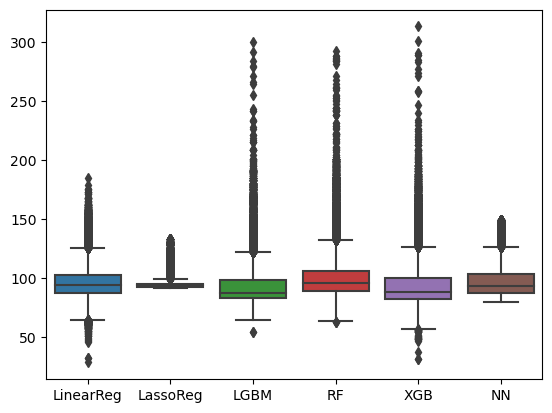

In [90]:
sns.boxplot(df[models_names])


<Axes: ylabel='Proportion'>

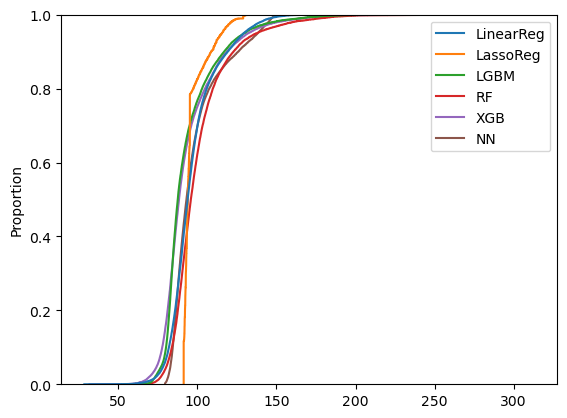

In [89]:
sns.ecdfplot(df[models_names])

# plt.ylim(0,2000)

In [107]:
pd.qcut(df.ZUST, q= 4)

0           (3.0, 4.0]
1           (3.0, 4.0]
2           (3.0, 4.0]
3           (4.0, 5.0]
4           (3.0, 4.0]
             ...      
36732    (-0.001, 2.0]
36733       (2.0, 3.0]
36734       (2.0, 3.0]
36735    (-0.001, 2.0]
36736       (2.0, 3.0]
Name: ZUST, Length: 36737, dtype: category
Categories (4, interval[float64, right]): [(-0.001, 2.0] < (2.0, 3.0] < (3.0, 4.0] < (4.0, 5.0]]

In [124]:
trx.columns[:100]

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'Group.1', 'Group.2',
       'REGCODE_GIS', 'KJ', 'KAUF_Q', 'KONPE', 'NUTZ_WUP', 'GEMCODE_BFS',
       'MAKROCODE', 'KAUFPR', 'BAUJ', 'VOL_GVA', 'VOL_SIA', 'LAND', 'ZUST',
       'STAND', 'MIKRO', 'ZWECK', 'FREI', 'ZIMMER', 'GARAGE', 'WHGTYP1',
       'WHGTYP2', 'GARSEP', 'GARINVOL', 'GAREXPAR', 'AUSSENPP',
       'ERNEUERUNGSJAHR', 'RENOVATIONSKOSTEN', 'VOL', 'DOPPEL', 'ECK', 'MIT',
       'FREIS', 'FER_TOUR', 'ALTER', 'ALTER2', 'MAKROLAGE', 'MAKROCODE_GIS',
       'KT.ORIG', 'KT', 'KT_KURZNAME', 'TYP00_12', 'TYP00_12_NAME', 'HOEHE',
       'HANGN', 'EXPO', 'SON_SOM', 'SON_WINT', 'SICHT_SEE', 'SICHT_BERG',
       'LAERM_B_D', 'LAERM_B_N', 'LAERM_STR_D', 'LAERM_STR_N', 'DIST_HAUPTSTR',
       'DIST_BAHNL', 'DIST_SENDE', 'DIST_ATOM', 'DIST_HOCHSP', 'DIST_ZENTR',
       'DIST_SCHUL', 'DIST_SHOP', 'DIST_HALTEST', 'DIST_NAT', 'DIST_SEE',
       'DIST_FLUSS', 'OEV_GUET', 'BAUZ_ML', 'ML_EFH', 'TRX_JAHR',
       'DIFFBEV5REL', 'KAUFKRAFT', 

In [180]:
corr_cols = ['BAUJ', 'VOL_GVA', 'LAND', 'ZUST',
       'STAND', 'MIKRO', 'ZWECK', 'FREI', 'ZIMMER', 'MAKROLAGE', 
       'KT', 'HANGN', 'EXPO', 'SON_SOM', 'SON_WINT', 'SICHT_SEE', 'SICHT_BERG',
       'LAERM_B_D', 'LAERM_B_N', 'LAERM_STR_D', 'LAERM_STR_N', 'DIST_HAUPTSTR',
       'DIST_BAHNL', 'DIST_SENDE', 'DIST_ATOM', 'DIST_HOCHSP', 'DIST_ZENTR',
       'DIST_SCHUL', 'DIST_SHOP', 'DIST_HALTEST', 'DIST_NAT', 'DIST_SEE',
       'DIST_FLUSS', 'OEV_GUET', 'BAUZ_ML', 'DIFFBEV5REL', 'KAUFKRAFT', 'ERREICH.OEV.BESCH', 'ERREICH.OEV.BEW',
       'REISE.OEV.LOG', 'SEEANSTOSS', 'EK.KT.HOCH', 'EKST.TOTAL.HOCH']

In [144]:
X.mean(1).sort_values().head(20)

DIST_SEE          -0.338730
TYP00_12          -0.162659
EKST.TOTAL.HOCH   -0.143767
REISE.OEV.LOG     -0.128718
EXPO              -0.113818
MIT               -0.084258
DIST_ZENTR        -0.079461
DIST_BAHNL        -0.075021
DIST_SENDE        -0.062764
BAUZ_ML           -0.048626
DIST_HOCHSP       -0.042441
ML_EFH            -0.040958
DIST_HAUPTSTR     -0.039894
HOEHE             -0.039236
FREI              -0.035151
WHGTYP1           -0.026730
EK.KT.HOCH        -0.023542
FER_TOUR          -0.018824
KT                -0.015957
WHGTYP2           -0.015140
dtype: float64

In [143]:
X.mean(1).sort_values().tail(20)

GARINVOL       0.062322
GARSEP         0.069903
LAND           0.075484
SON_WINT       0.075602
KT.ORIG        0.093441
DIST_FLUSS     0.106053
DIST_NAT       0.108395
MIKRO          0.108558
SICHT_BERG     0.115033
GEMCODE_BFS    0.120334
VOL_GVA        0.147392
VOL            0.161647
STAND          0.169363
HANGN          0.186371
DIST_ATOM      0.209042
MAKROLAGE      0.386322
KAUFKRAFT      0.407712
KAUFPR         0.411012
SEEANSTOSS     0.433262
SICHT_SEE      0.453120
dtype: float64

C:\Users\swietek\AppData\Local\Temp\ipykernel_15064\1591278603.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  X = trx.corr().loc[corr_cols,models_names]
c:\Users\swietek\Miniconda3\envs\env_intel_sdb\lib\site-packages\seaborn\matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


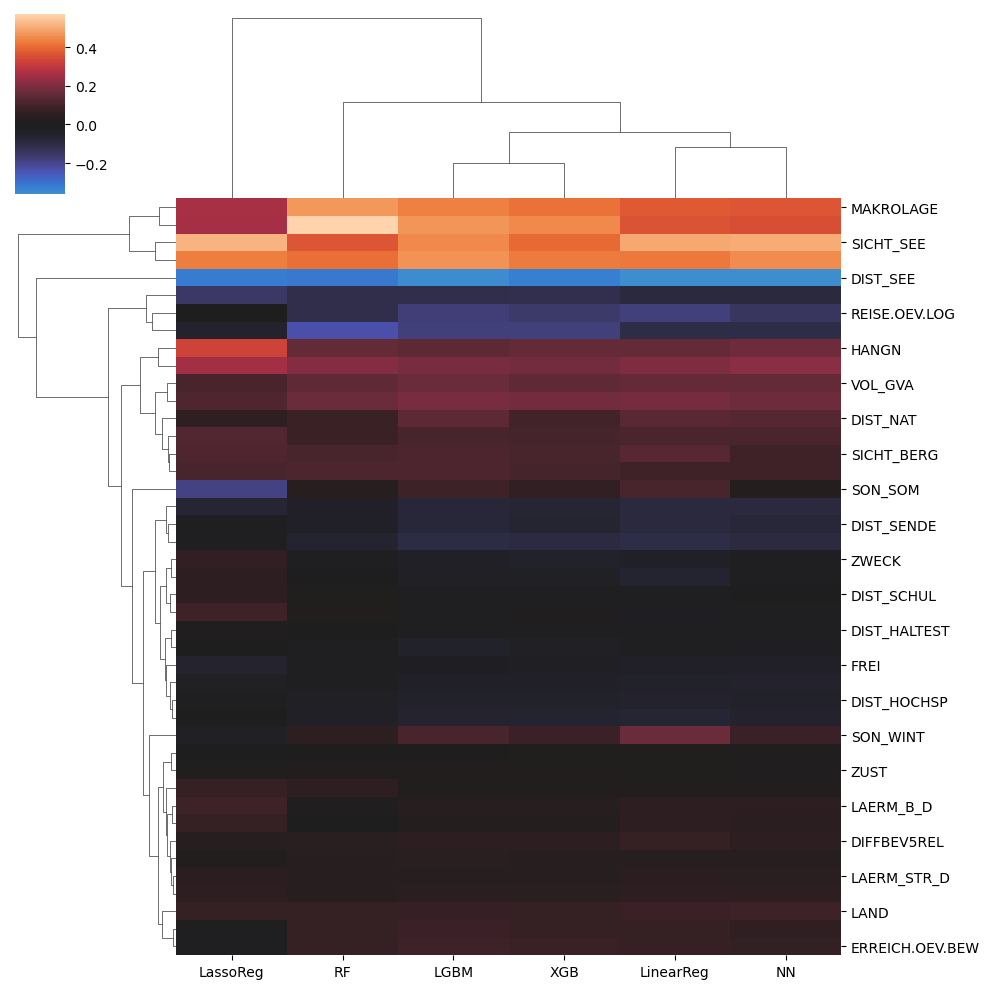

In [181]:
X = trx.corr().loc[corr_cols,models_names]

sns.clustermap(X, center=0, square =True,figsize=(10,10))

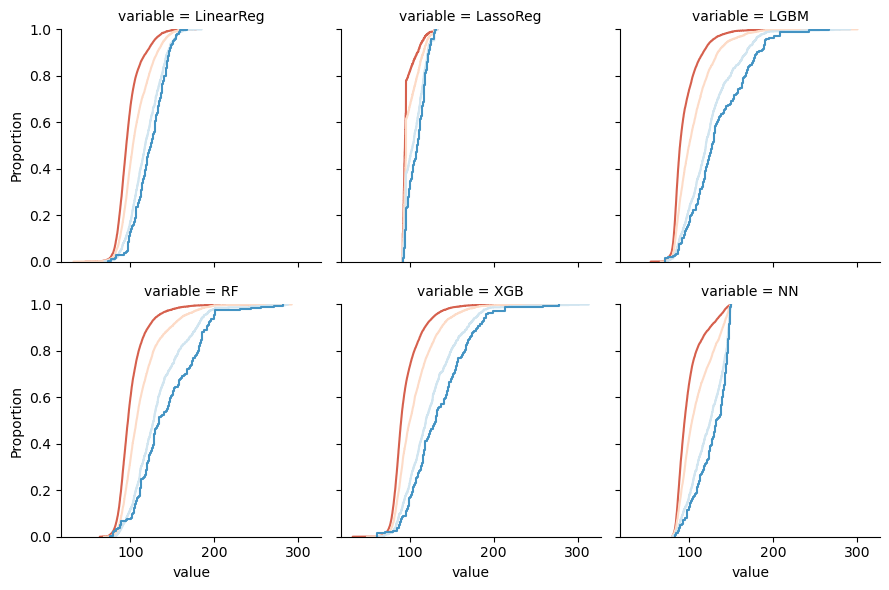

In [178]:
sel_hue = 'KAUFPR'
g = sns.FacetGrid(data = df.assign(feat = pd.cut(df[sel_hue], bins = mc.NaturalBreaks(df[sel_hue].dropna()).bins.tolist()))[['feat']+models_names].melt(id_vars='feat').dropna(), 
                  hue = 'feat', col='variable', col_wrap=3, palette='RdBu')

g.map(sns.ecdfplot, 'value')

In [182]:
corr_cols

['BAUJ',
 'VOL_GVA',
 'LAND',
 'ZUST',
 'STAND',
 'MIKRO',
 'ZWECK',
 'FREI',
 'ZIMMER',
 'MAKROLAGE',
 'KT',
 'HANGN',
 'EXPO',
 'SON_SOM',
 'SON_WINT',
 'SICHT_SEE',
 'SICHT_BERG',
 'LAERM_B_D',
 'LAERM_B_N',
 'LAERM_STR_D',
 'LAERM_STR_N',
 'DIST_HAUPTSTR',
 'DIST_BAHNL',
 'DIST_SENDE',
 'DIST_ATOM',
 'DIST_HOCHSP',
 'DIST_ZENTR',
 'DIST_SCHUL',
 'DIST_SHOP',
 'DIST_HALTEST',
 'DIST_NAT',
 'DIST_SEE',
 'DIST_FLUSS',
 'OEV_GUET',
 'BAUZ_ML',
 'DIFFBEV5REL',
 'KAUFKRAFT',
 'ERREICH.OEV.BESCH',
 'ERREICH.OEV.BEW',
 'REISE.OEV.LOG',
 'SEEANSTOSS',
 'EK.KT.HOCH',
 'EKST.TOTAL.HOCH']

<Axes: xlabel='0', ylabel='1'>

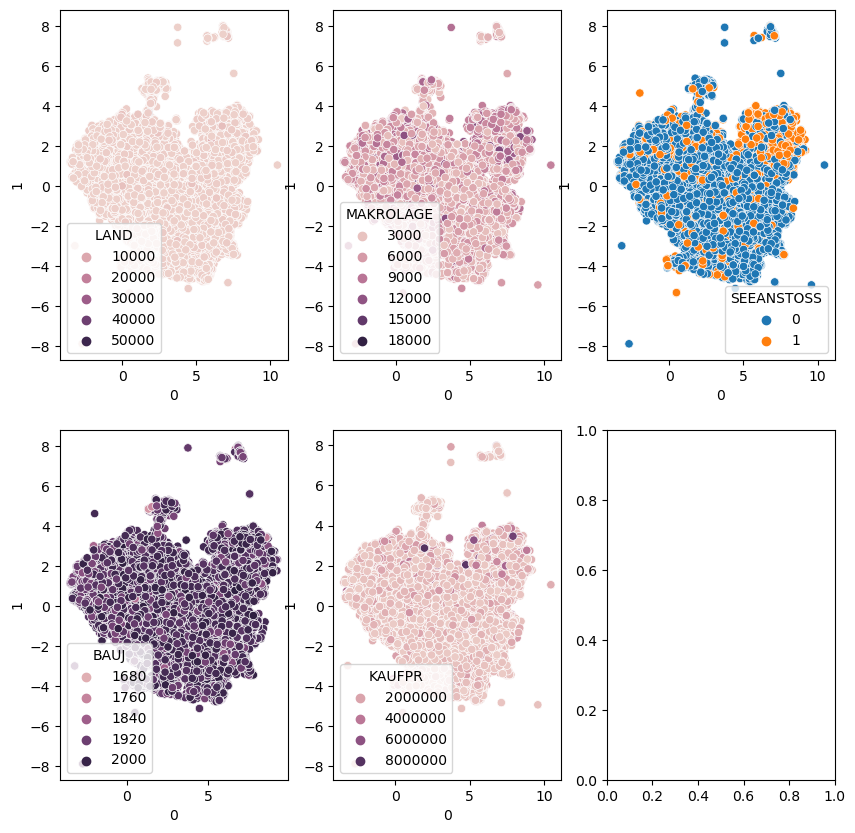

In [183]:
f, ax = plt.subplots(2,3, figsize = (10,10), squeeze=True)
ax = ax.flatten()

sns.scatterplot(data = df.sample(10000), x = 0, y = 1, hue = "LAND", ax = ax[0])
sns.scatterplot(data = df.sample(10000), x = 0, y = 1, hue = "MAKROLAGE", ax = ax[1])
sns.scatterplot(data = df.sample(10000), x = 0, y = 1, hue = "SEEANSTOSS", ax = ax[2])
sns.scatterplot(data = df.sample(10000), x = 0, y = 1, hue = "BAUJ", ax = ax[3])
sns.scatterplot(data = df.sample(10000), x = 0, y = 1, hue = "KAUFPR", ax = ax[4])


<Axes: xlabel='0', ylabel='1'>

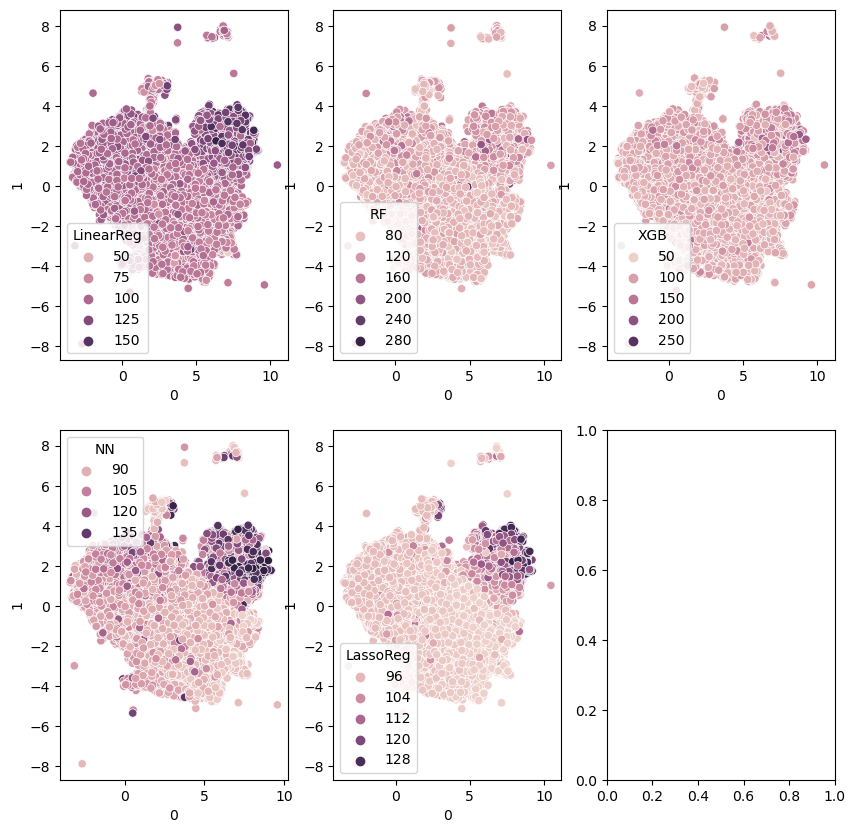

In [79]:
f, ax = plt.subplots(2,3, figsize = (10,10), squeeze=True)
ax = ax.flatten()

sns.scatterplot(data = df.sample(10000), x = 0, y = 1, hue = "LinearReg", ax = ax[0])
sns.scatterplot(data = df.sample(10000), x = 0, y = 1, hue = "RF", ax = ax[1])
sns.scatterplot(data = df.sample(10000), x = 0, y = 1, hue = "XGB", ax = ax[2])
sns.scatterplot(data = df.sample(10000), x = 0, y = 1, hue = "NN", ax = ax[3])
sns.scatterplot(data = df.sample(10000), x = 0, y = 1, hue = "LassoReg", ax = ax[4])

